In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings("ignore")


## DATA UNDERSTANDING

In [2]:
data = pd.read_csv('Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


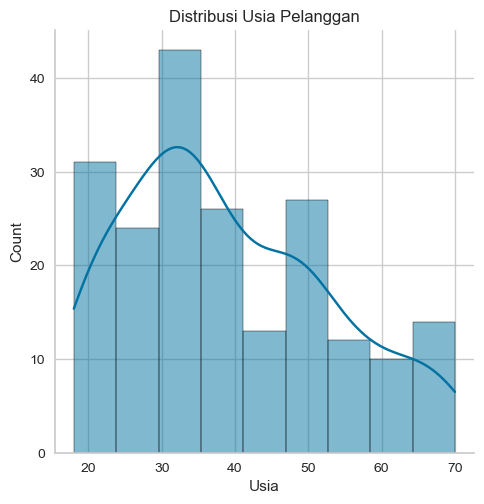

In [5]:
# memvisualisasikan distribusi data menggunakan histogram
sns.displot(data['Age'],kde='True')
plt.Figure(figsize=(10,10))
plt.title('Distribusi Usia Pelanggan')
plt.xlabel('Usia')
plt.show()

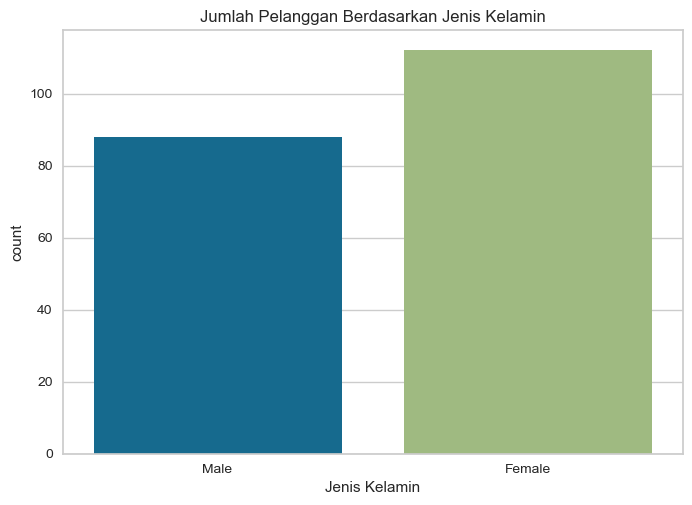

In [7]:
sns.countplot(x='Gender', data=data)
plt.title('Jumlah Pelanggan Berdasarkan Jenis Kelamin')
plt.xlabel('Jenis Kelamin')
plt.show()

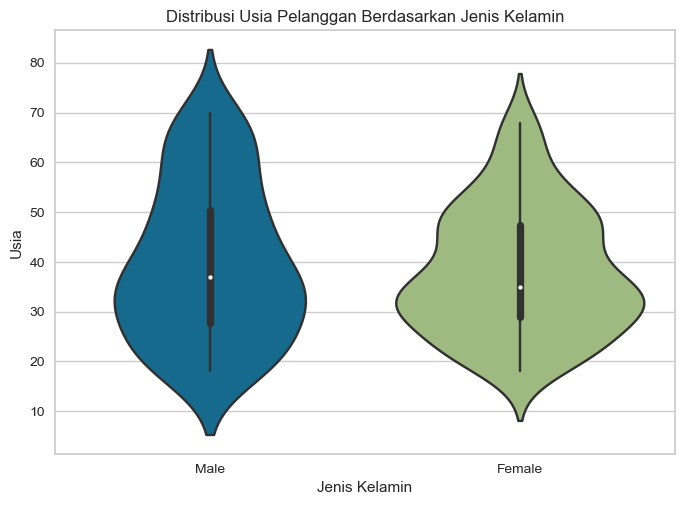

In [8]:
sns.violinplot(x='Gender', y='Age', data=data)
plt.title('Distribusi Usia Pelanggan Berdasarkan Jenis Kelamin')
plt.xlabel('Jenis Kelamin')
plt.ylabel('Usia')
plt.show()

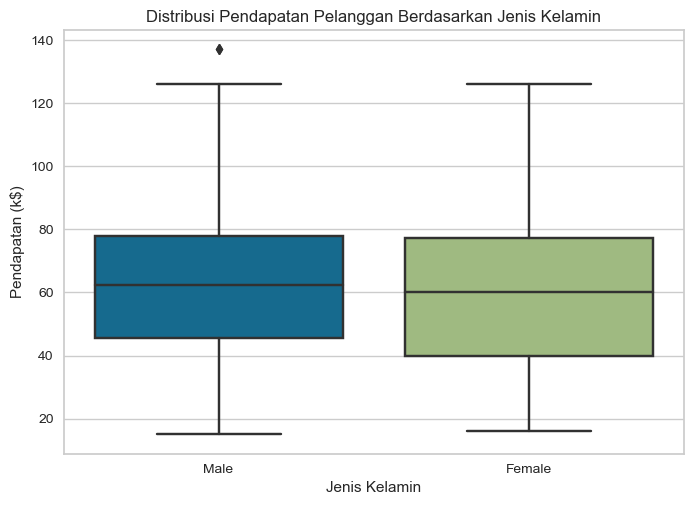

In [9]:
# memvisualisasikan rata-rata pendapatan pelanggan berdasarkan jenis kelamin menggunakan box plot
sns.boxplot(x='Gender', y='Annual Income (k$)', data=data)
plt.title('Distribusi Pendapatan Pelanggan Berdasarkan Jenis Kelamin')
plt.xlabel('Jenis Kelamin')
plt.ylabel('Pendapatan (k$)')
plt.show()

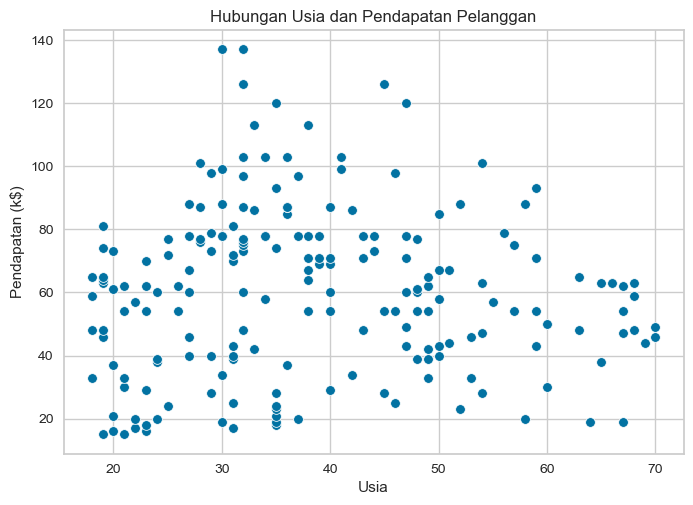

In [10]:
# memvisualisasikan hubungan antar variabel menggunakan scatter plot
sns.scatterplot(x='Age', y='Annual Income (k$)', data=data)
plt.Figure(figsize=(10,10))
plt.title('Hubungan Usia dan Pendapatan Pelanggan')
plt.xlabel('Usia')
plt.ylabel('Pendapatan (k$)')
plt.show()

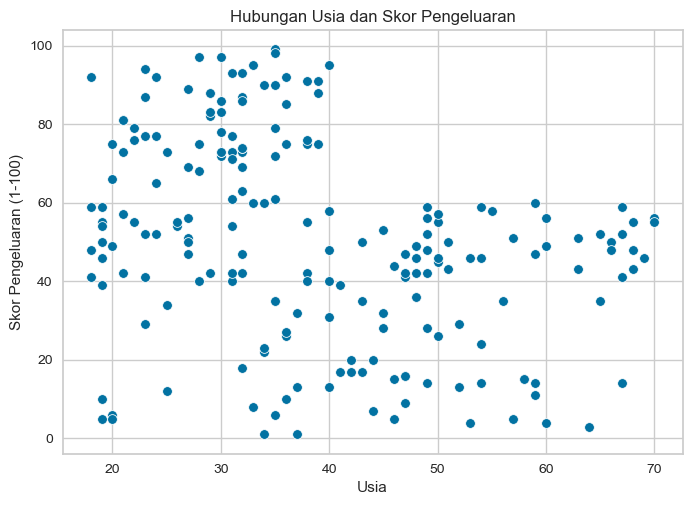

In [11]:
sns.scatterplot(data=data,x='Age',y='Spending Score (1-100)')
plt.Figure(figsize=(10,10))
plt.title('Hubungan Usia dan Skor Pengeluaran')
plt.xlabel('Usia')
plt.ylabel('Skor Pengeluaran (1-100)')
plt.show()

<AxesSubplot:xlabel='Age', ylabel='Annual Income (k$)'>

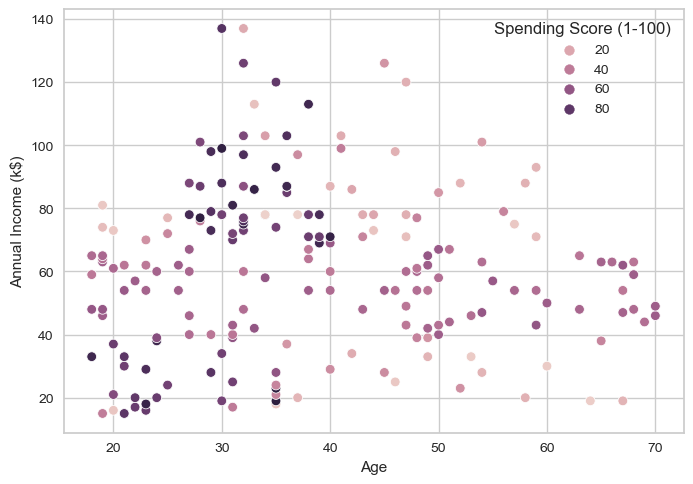

In [12]:
sns.scatterplot(x='Age',y='Annual Income (k$)',data=data,hue='Spending Score (1-100)')

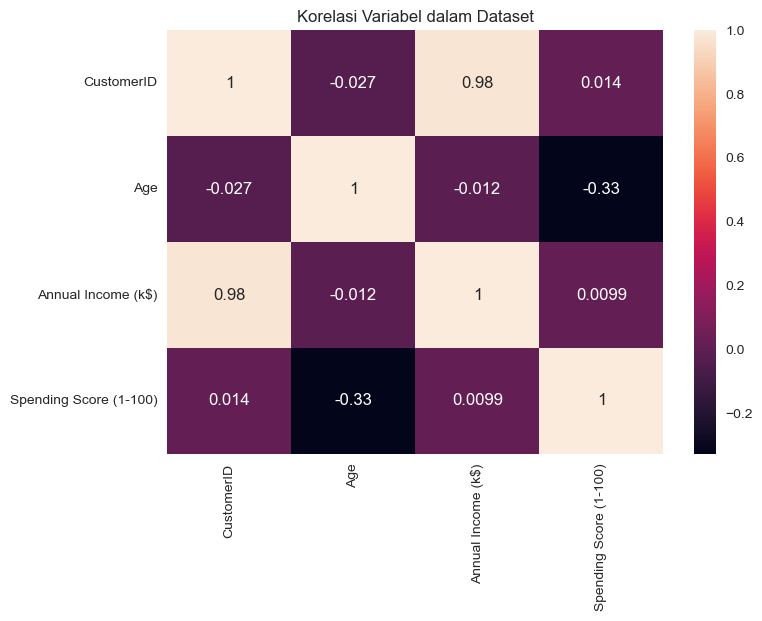

In [13]:
# memvisualisasikan korelasi antar variabel menggunakan heatmap
corr = data.corr()
plt.Figure(figsize=(10,10))
sns.heatmap(corr, annot=True)
plt.title('Korelasi Variabel dalam Dataset')
plt.show()

## Data Prep

In [14]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [15]:
le = LabelEncoder()
gender = le.fit_transform(data['Gender'])
data['Gender'] =gender
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


## Modelling Using KMeans


Evaluate using Elbow Method

Text(0, 0.5, 'nilai optimum')

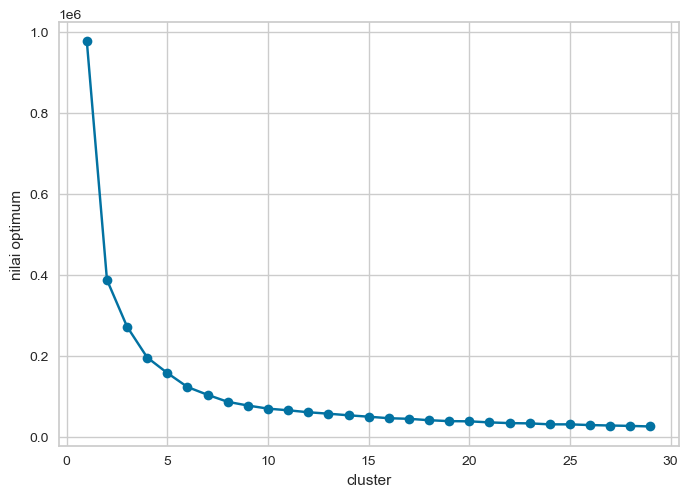

In [16]:
ssd = []
I = range(1,30)
for i in I:
    kmeans = KMeans(n_clusters=i).fit(data)
    ssd.append(kmeans.inertia_)
plt.plot(I,ssd,'o-')
plt.xlabel('cluster')
plt.ylabel('nilai optimum')

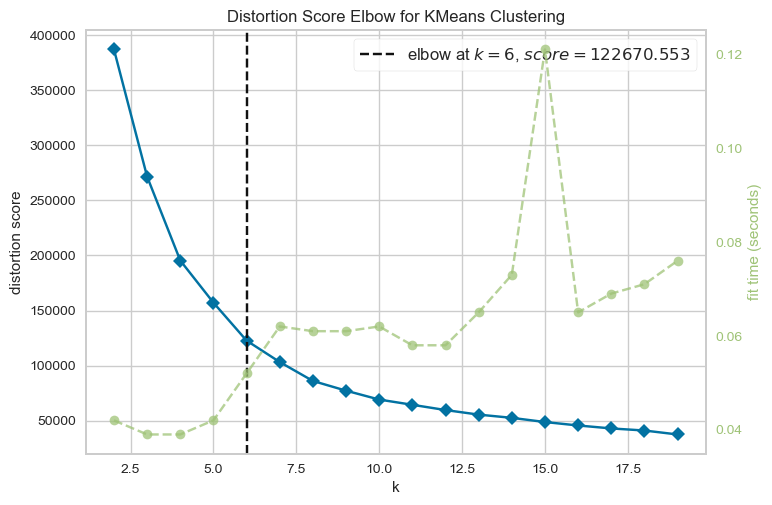

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [17]:
kmeans = KMeans()
visu = KElbowVisualizer(kmeans,k=(2,20))
visu.fit(data)
visu.poof()

### Create model with n_cluster 6

In [18]:
model = KMeans(n_clusters=6)
model.fit(data)

KMeans(n_clusters=6)

In [19]:
Clusters = model.labels_
data['Cluster'] = Clusters
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,1,19,15,39,2
1,2,1,21,15,81,1
2,3,0,20,16,6,2
3,4,0,23,16,77,1
4,5,0,31,17,40,2
...,...,...,...,...,...,...
195,196,0,35,120,79,3
196,197,0,45,126,28,4
197,198,1,32,126,74,3
198,199,1,32,137,18,4


In [20]:
data.Cluster.unique()

array([2, 1, 5, 0, 4, 3])

In [21]:
print(model.cluster_centers_)

[[112.97826087   0.43478261  38.02173913  65.02173913  52.82608696]
 [ 24.           0.39130435  25.52173913  26.30434783  78.56521739]
 [ 23.           0.39130435  45.2173913   26.30434783  20.91304348]
 [169.87096774   0.41935484  31.93548387  90.4516129   83.03225806]
 [165.52941176   0.55882353  41.64705882  88.73529412  16.76470588]
 [ 68.09302326   0.41860465  46.23255814  48.60465116  50.65116279]]


## Visualisation

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

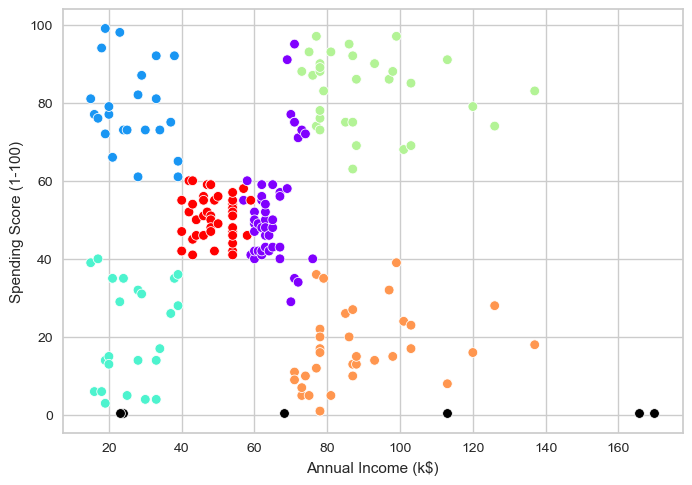

In [26]:
sns.scatterplot(data = data,x = 'Annual Income (k$)',y='Spending Score (1-100)',c=model.labels_,cmap='rainbow')
sns.scatterplot(x=model.cluster_centers_[:,0],y=model.cluster_centers_[:,1],c='black')

##  Cluster Hierarchy

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

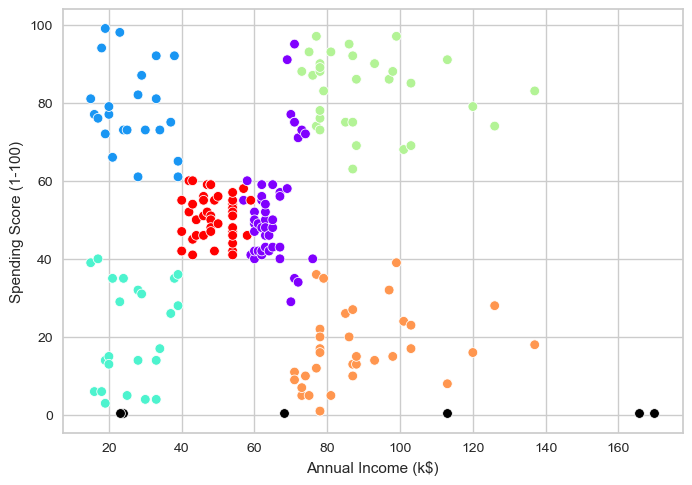

In [23]:
hc_complete = linkage(data, "complete")
hc_average = linkage(data, "average")

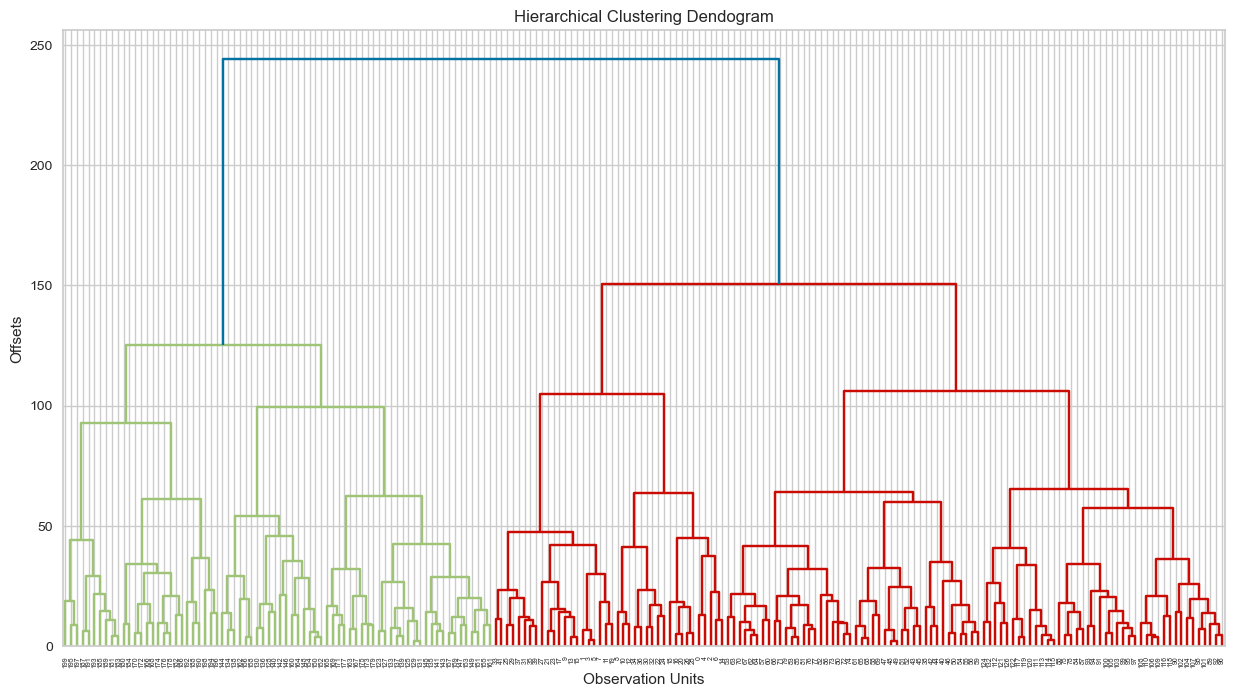

In [24]:
plt.figure(figsize=(15,8))
plt.title("Hierarchical Clustering Dendogram")
plt.xlabel("Observation Units")
plt.ylabel("Offsets")
dendrogram(hc_complete,
          leaf_font_size= 5);

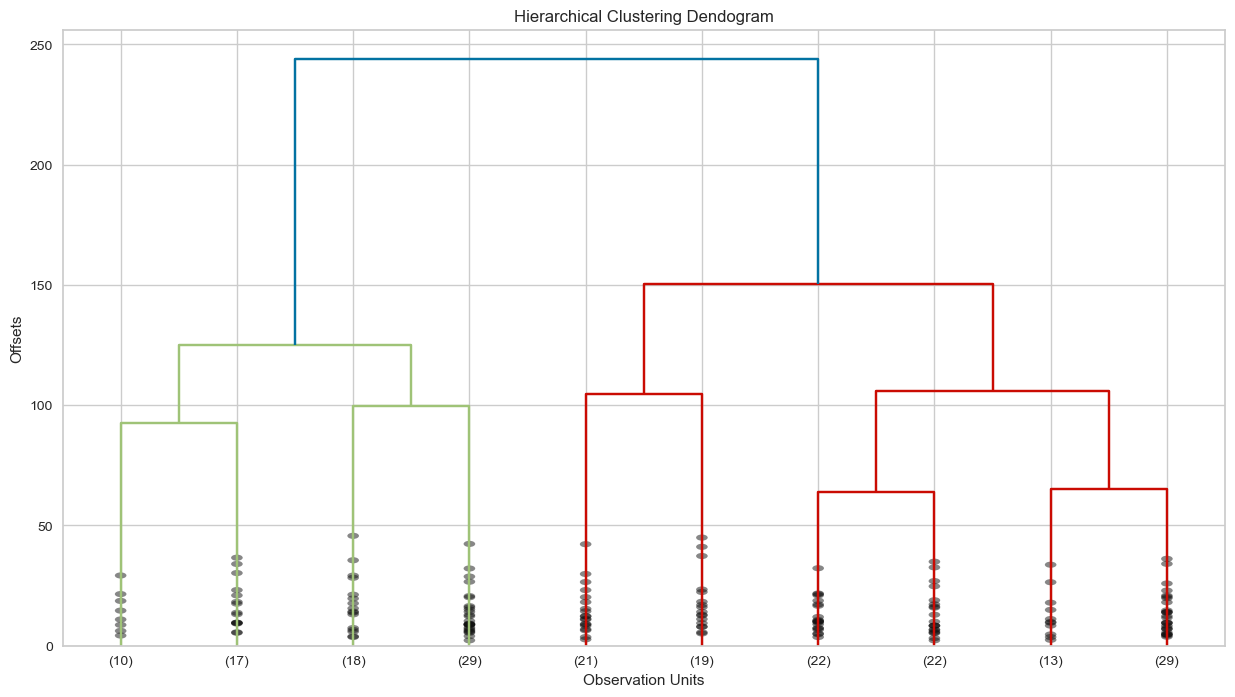

In [25]:
plt.figure(figsize=(15,8))
plt.title("Hierarchical Clustering Dendogram")
plt.xlabel("Observation Units")
plt.ylabel("Offsets")
dendrogram(hc_complete,
          truncate_mode="lastp",
          p=10,
          show_contracted=True,
          leaf_font_size=10);